In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
variance = float(input())

2


In [15]:
 n = int(input())

5


In [16]:
mask  = np.zeros((n,n))

In [17]:
for i in range(n):
    for j in range(n):
        x = i-n//2
        y = j-n//2
        mask[i][j] = np.exp(-1*(x**2+y**2)/(2*variance))
    

In [18]:
c = np.ceil(1/mask[0][0])
c

8.0

In [19]:
gaussian_mask = np.around(mask,decimals = 3)
gaussian_mask

array([[0.135, 0.287, 0.368, 0.287, 0.135],
       [0.287, 0.607, 0.779, 0.607, 0.287],
       [0.368, 0.779, 1.   , 0.779, 0.368],
       [0.287, 0.607, 0.779, 0.607, 0.287],
       [0.135, 0.287, 0.368, 0.287, 0.135]])

In [20]:
gaussian_mask = np.around(mask*c).astype(int)
gaussian_mask

array([[1, 2, 3, 2, 1],
       [2, 5, 6, 5, 2],
       [3, 6, 8, 6, 3],
       [2, 5, 6, 5, 2],
       [1, 2, 3, 2, 1]])

In [21]:
n_factor = sum(sum(mask))

In [22]:
gaussian_mask = gaussian_mask/n_factor

In [23]:
def padding(x,size):
  if size==0:
    return x
  x = np.append(x[:, 0:1], x, axis=1)
  x = np.append(x, x[:, -1:], axis=1)
  x = np.append(x[0:1, :], x, axis=0)
  x = np.append(x, x[-1:, :], axis=0)
  return padding(x, size - 1)

In [24]:
def convolve(img,mask):
  print(img.shape)
  ps = (mask.shape[0]-1)//2
  m = img.shape[0] + 2 * ps - mask.shape[0] + 1
  n = img.shape[1] + 2 * ps - mask.shape[1] + 1
  img = padding(img,ps)
  print(img.shape)
  res = np.zeros((m,n))
  for i in range(ps,m-ps+1):
    for j in range(ps,n-ps+1):
      ghgio = np.sum(img[i-ps:i+ps+1,j-ps:j+ps+1]*mask)
      res[i,j] = ghgio
  return res.astype(int)

In [25]:
img = cv2.imread("gaussian.jpeg",cv2.IMREAD_GRAYSCALE)
img2 = convolve(img, gaussian_mask)

(225, 225)
(229, 229)


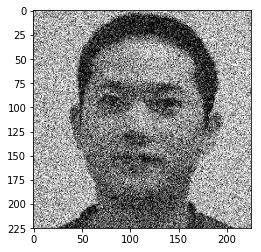

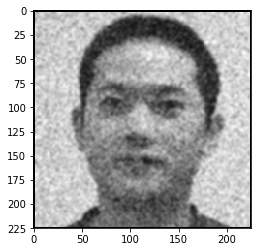

In [26]:
img = cv2.imread("gaussian.jpeg",cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.show()

plt.imshow(img2,cmap='gray')
plt.show()

